# Pymaceuticals Inc.
---

### Analysis

#1 - The average tumor volume increases up as the weight of the mouse increases

#2 - The correlation (r-value) between tumor volume and weight is 0.84, which indicates that the more a mouse weighs, the less effective the treatment for the  tumors is.  Another way to say that is as the weight of a mouse increases, the volume of the tumors will also increase because the drugs become less effiective.

#3 - The final tumor volumes are lower for Capomulin and Ramicane than Infubinol and Ceftamin indicating that Capomulin and Ramicane are more effective at shrinking tumor sizes

#4 - There is only one outlier in this data, indicating that it is significant statistically

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merge_df.sample(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1158,l733,Ceftamin,Female,4,30,25,54.951668,1
127,r554,Capomulin,Female,8,17,10,39.005494,2
69,m546,Ramicane,Male,18,16,20,36.712295,0
1313,o813,Infubinol,Male,24,28,0,45.000000,0
1692,w350,Propriva,Male,7,26,40,62.324348,2
1447,r107,Propriva,Female,2,28,10,49.186011,0
411,q597,Ramicane,Male,20,25,0,45.000000,0
800,e476,Infubinol,Male,23,26,45,62.435404,1
1136,l700,Naftisol,Female,18,27,15,49.040225,1
1773,x581,Ceftamin,Female,19,28,45,64.634949,3


In [110]:
# Checking the number of mice.
len(merge_df)

1893

In [112]:
#checking the number of unique mice
number_of_mice = mouse_metadata["Mouse ID"].count()
print(number_of_mice)

249


In [113]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df[merge_df.duplicated(['Mouse ID',  'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [115]:
#getting all the data per duplicate mouse ID
#unique_mouse_ID.describe()
merge_df.drop(merge_df[merge_df['Mouse ID']== 'g989'].index, inplace=True)
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [90]:
#checking total number of mice in merge_df DataFrame after duplicates are dropped
len(merge_df)

1880

## Summary Statistics

In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_df = merge_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_variance = summary_df['Tumor Volume (mm3)'].var()
tumor_SD = summary_df['Tumor Volume (mm3)'].std()
tumor_SEM = summary_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary_df = pd.DataFrame ({'Mean': tumor_mean, 'Median': tumor_median, 'Variance': tumor_variance, 'Standard Deviation': tumor_SD, 'SEM': tumor_SEM})
tumor_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_summary_df = merge_df.groupby('Drug Regimen').describe()
agg_summary_df

Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          148.0  10.006757  6.946341  1.0   5.00   7.5  16.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          148.0  27.135135  ...          56.491585  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                148.0  1.013514  1.106484  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

## Bar and Pie Charts

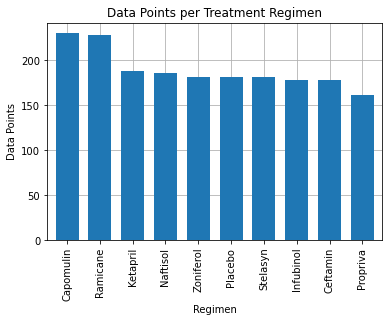

In [41]:
#Bar Pot #1 showing timepoints and drug regimen
bar_plot = merge_df['Drug Regimen'].value_counts().plot.bar(width = 0.7, zorder=3)

#formating
bar_plot.set_xlabel("Regimen")
bar_plot.set_ylabel("Data Points")
bar_plot.set_title("Data Points per Treatment Regimen")
bar_plot.grid(zorder=0)

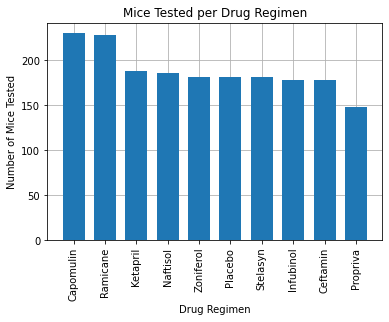

In [99]:
#Bar Plot #2 showing total timepoints per drug regimen
counts = merge_df['Drug Regimen'].value_counts()

x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, width = 0.7, zorder = 3)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)
plt.xticks(rotation=90)

# merge_df_pyplot = pd.DataFrame(merge_df)
# merge_df_pyplot.plot.bar(legend=False)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Mice Tested per Drug Regimen")
plt.grid(zorder=0)

plt.show()

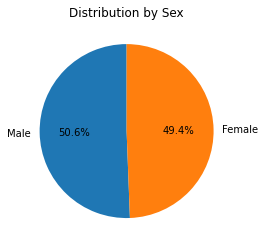

In [58]:
#Pie Plot #1 showing distribution of male vs female mice using pandas
gender_data = merge_df['Sex'].value_counts()
pie_plot_gender = gender_data.plot.pie(title='Distribution by Sex', autopct="%1.1f%%", startangle=90)
pie_plot_gender.set_ylabel('')
plt.show()

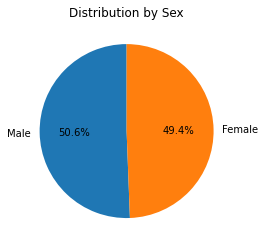

In [60]:
#Pie Plot #2 showing distribution of male and female mice using pyplot
pyplot_gender_data = merge_df['Sex'].value_counts()
plt.pie(pyplot_gender_data, labels=pyplot_gender_data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(merge_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_timepoint_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merge_df = pd.merge(merge_df, max_timepoint_df, on='Mouse ID')
timepoint_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [67]:
#stats
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

for drug in drugs:
    temp_df = timepoint_merge_df.loc[timepoint_merge_df['Drug Regimen'] == drug]
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    lower_bound = lowerq - (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    upper_bound = upperq - (1.5*iqr)
    print(f'Upper Bound for  {drug}: {upper_bound}')
    
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)])
    print(f'Number of {drug} outliers {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for  Capomulin: 28.486425109999995
Number of Capomulin outliers 64      30.485985
104     31.023923
124     31.896238
134     32.377357
144     33.329098
164     34.455298
204     37.311846
224     36.041047
244     37.074024
282     38.846876
299     38.939633
309     38.982878
317     38.753265
337     38.125164
340     39.952347
350     40.658124
360     40.159220
370     40.728578
380     41.483008
390     41.581521
440     47.685963
1455    46.539206
Name: Tumor Volume (mm3), dtype: float64
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for  Ramicane: 27.01120119
Number of Ramicane outliers 49     29.128472
59     30.276232
74     30.564625
84     30.638696
94     31.560470
114    31.095335
154    33.397653
174    32.978522
184    33.562402
194    36.134852
214    38.810366
234    37.225650
254    36.374510
262    36.561652
272    37.311236
28

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


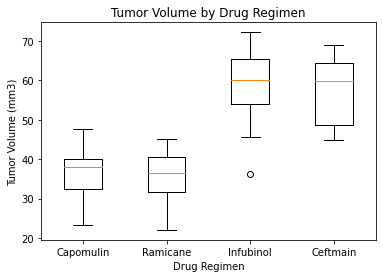

In [106]:
#Box Plot #1
plt.boxplot(drug_values)

plt.xticks([1, 2, 3, 4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftmain'])
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume by Drug Regimen')

plt.show()

## Line and Scatter Plots

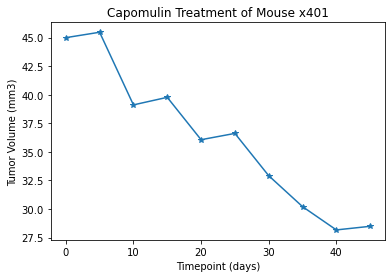

In [71]:
#line Plot #1
Capomulin_mouse = merge_df.loc[merge_df['Mouse ID'] == 'x401']

plt.plot(Capomulin_mouse['Timepoint'], Capomulin_mouse['Tumor Volume (mm3)'], marker = '*')

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse x401")

plt.show()

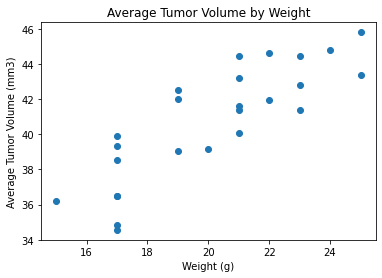

In [80]:
#Scatterplot #1
capomulin_df = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})

capomulin_avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol = capomulin_avg_vol_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
final_avg_vol

x = final_avg_vol['Weight (g)']
y = final_avg_vol['Average Tumor Volume']

plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")

plt.show()

## Correlation and Regression

The correlation between the weight and average tumor volume on the Capomulin Regimen is 0.84.


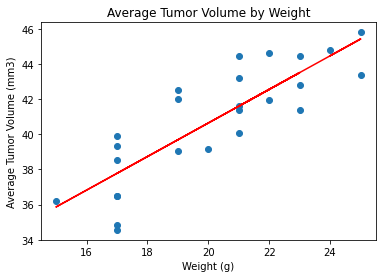

In [101]:
#Getting Correlation Coefficient
capomulin_df = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_tumor_weight = capomulin_avg_vol_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
final_tumor_weight

x = final_tumor_weight['Weight (g)']
y = final_tumor_weight['Average Tumor Volume']

correlation_coefficient = st.pearsonr(x,y)
print(f'The correlation between the weight and average tumor volume on the Capomulin Regimen is {round(correlation_coefficient[0],2)}.')

#Calculating Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept,2))
line_equation

plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.annotate(line_equation,(25,0), fontsize=20,color='blue')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()